In [5]:
# Let's code it up, preamble first. 

import numpy as np # basic vector/matrix math
import matplotlib.pyplot as plt # plotting and illustrations 
import seaborn as sns # advanced plotting and illustrations. 
import pandas as pd # data loading, saving, and general data manipulation. 
import scipy.stats as stats # inter alia, statistical distributions, functions and relevant objects.
import scipy.optimize as optimize 
import torch # ML/AI model's and general optimization 

# STA 2453 Lab 1 Submission

This lab notebook must be completed in the appropriate time during class and invigilated by the instructor. There are _ questions, you must add both this notebook, and another generated .py file to the PR. 

Once the PR is in place, please tag both me and the TA in it. So in the end you will have two files. 

- `STA2453-Lab-1.ipynb`
- `STA2453-Lab-1.py`

Both of these are needed for a good submission. 



# Case Study: Does God Hate Rich People? 


## Introduction 

Extreme weather events in the U.S. are regularly tracked by the National Oceanic and Atomspheric Administration (NOAA).

The NCDC Storm Events database is provided by the National Weather Service (NWS) and contain statistics on personal injuries and damage estimates. (ref. gov.noaa.ncdc:C00510). 

## The question is, are high-income or low-income households more susceptible to extreme weather events? 

The US Household Income dataset provided by Golden Oak Research Group contains 32,000 records on US Household Income Statistics & Geo Locations. The dataset originally developed for real estate and business investment research. Income is a vital element when determining both quality and socioeconomic features of a given geographic location. (ref. Golden Oak Research Group, LLC. “U.S. Income Database Kaggle”. Publication: 5, August 2017.)


The two files listed here: 

## Storm Weather Event Data
`https://raw.githubusercontent.com/nikpocuca/sta2453-2022.github.io/master/StormEvents_locations-ftp_v1.0_d2014_c20180718.csv`


## Golden Oak Research Group Data
`https://raw.githubusercontent.com/nikpocuca/sta2453-2022.github.io/master/kaggle_income_clean.csv`

In [1]:
# Load data

!wget https://raw.githubusercontent.com/nikpocuca/sta2453-2022.github.io/master/StormEvents_locations-ftp_v1.0_d2014_c20180718.csv

--2022-09-27 17:01:12--  https://raw.githubusercontent.com/nikpocuca/sta2453-2022.github.io/master/StormEvents_locations-ftp_v1.0_d2014_c20180718.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3967894 (3.8M) [text/plain]
Saving to: ‘StormEvents_locations-ftp_v1.0_d2014_c20180718.csv’

StormEvents_locatio 100%[===================>]   3.78M  23.1MB/s    in 0.2s    

2022-09-27 17:01:13 (23.1 MB/s) - ‘StormEvents_locations-ftp_v1.0_d2014_c20180718.csv’ saved [3967894/3967894]



In [2]:
!wget https://raw.githubusercontent.com/nikpocuca/sta2453-2022.github.io/master/kaggle_income_clean.csv

--2022-09-27 17:01:13--  https://raw.githubusercontent.com/nikpocuca/sta2453-2022.github.io/master/kaggle_income_clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5484778 (5.2M) [text/plain]
Saving to: ‘kaggle_income_clean.csv’

kaggle_income_clean 100%[===================>]   5.23M  29.4MB/s    in 0.2s    

2022-09-27 17:01:14 (29.4 MB/s) - ‘kaggle_income_clean.csv’ saved [5484778/5484778]



In [6]:
storm_df = pd.read_csv('/content/StormEvents_locations-ftp_v1.0_d2014_c20180718.csv')
income_df = pd.read_csv('kaggle_income_clean.csv')

In [7]:
storm_df

,YEARMONTH,EPISODE_ID,EVENT_ID,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2
0,201405,84460,509925,1,2.00,N,BAKERSFIELD,30.9090,-102.2800,3054540,10216800
1,201405,84460,509932,1,2.00,NW,STILES,31.4205,-101.6040,3125230,10136240
2,201405,84460,509935,1,29.00,NNE,SANDERSON,30.5378,-102.2139,3032268,10212834
3,201405,84460,509938,1,0.00,N,IRAAN,30.9200,-101.8800,3055200,10152800
4,201405,84460,509939,1,0.00,N,IRAAN,30.9200,-101.8800,3055200,10152800
...,...,...,...,...,...,...,...,...,...,...,...
53256,201409,90664,544002,1,0.54,W,MARSHALL,39.1300,-93.2100,397800,9312600
53257,201411,90665,544005,1,5.52,SSW,LOCKHART,30.4023,-90.9214,3024138,9055284
53258,201411,90665,544005,2,4.51,S,LOCKHART,30.4154,-90.9104,3024924,9054624
53259,201411,90665,544008,1,4.15,N,LIVINGSTON,30.5597,-90.7428,3033582,9044568


In [ ]:
income_df.head()
income_df.info

<bound method DataFrame.info of        Unnamed: 0  Unnamed: 0.1       id  State_Code   State_Name State_ab  \
0               0             1  1011000           1      Alabama       AL   
1               1             2  1011010           1      Alabama       AL   
2               2             3  1011020           1      Alabama       AL   
3               3             4  1011030           1      Alabama       AL   
4               4             5  1011040           1      Alabama       AL   
...           ...           ...      ...         ...          ...      ...   
32521       32521         32522   720296          72  Puerto Rico       PR   
32522       32522         32523  7202966          72  Puerto Rico       PR   
32523       32523         32524  7202976          72  Puerto Rico       PR   
32524       32524         32525  7202986          72  Puerto Rico       PR   
32525       32525         32526  7202996          72  Puerto Rico       PR   

                   County      


## Cleaning Data 

We want to take only the continental US data, so that involves the following: 

- `20 < Lat < 50`
- `Lon > -140`


Furthermore we want to create two dataframes, one for poor people, one for rich people. According to the US Census Bureau, a person who's average income is below \$25k is considered below the poverty line, while a person exceeding \$100k is considered wealthy. 

Create two dataframes called `rich_df` and `poor_df` for analysis after cleaning out for strictly continental US. 


In [15]:
# clean df. 
storm_df_cleaned = storm_df.loc[(storm_df['LATITUDE'] > 20) & (storm_df['LATITUDE'] < 50) & (storm_df['LONGITUDE'] > -140)]
storm_df_cleaned.reset_index(inplace=True)
storm_df_cleaned

,index,YEARMONTH,EPISODE_ID,EVENT_ID,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2
0,0,201405,84460,509925,1,2.00,N,BAKERSFIELD,30.9090,-102.2800,3054540,10216800
1,1,201405,84460,509932,1,2.00,NW,STILES,31.4205,-101.6040,3125230,10136240
2,2,201405,84460,509935,1,29.00,NNE,SANDERSON,30.5378,-102.2139,3032268,10212834
3,3,201405,84460,509938,1,0.00,N,IRAAN,30.9200,-101.8800,3055200,10152800
4,4,201405,84460,509939,1,0.00,N,IRAAN,30.9200,-101.8800,3055200,10152800
...,...,...,...,...,...,...,...,...,...,...,...,...
52153,53256,201409,90664,544002,1,0.54,W,MARSHALL,39.1300,-93.2100,397800,9312600
52154,53257,201411,90665,544005,1,5.52,SSW,LOCKHART,30.4023,-90.9214,3024138,9055284
52155,53258,201411,90665,544005,2,4.51,S,LOCKHART,30.4154,-90.9104,3024924,9054624
52156,53259,201411,90665,544008,1,4.15,N,LIVINGSTON,30.5597,-90.7428,3033582,9044568


In [14]:
storm_df_cleaned.iloc[0]

YEARMONTH              201405
EPISODE_ID              84460
EVENT_ID               509925
LOCATION_INDEX              1
RANGE                     2.0
AZIMUTH                     N
LOCATION          BAKERSFIELD
LATITUDE               30.909
LONGITUDE             -102.28
LAT2                  3054540
LON2                 10216800
Name: 0, dtype: object

In [16]:
storm_df_cleaned.iloc[0]

index                       0
YEARMONTH              201405
EPISODE_ID              84460
EVENT_ID               509925
LOCATION_INDEX              1
RANGE                     2.0
AZIMUTH                     N
LOCATION          BAKERSFIELD
LATITUDE               30.909
LONGITUDE             -102.28
LAT2                  3054540
LON2                 10216800
Name: 0, dtype: object

In [ ]:
income_df_cleaned = income_df.loc[(income_df['Lat'] > 20) & (income_df['Lat'] < 50) & (income_df['Lon'] > -140)]
income_df_cleaned.reset_index(inplace=True)
income_df_cleaned

,index,Unnamed: 0,Unnamed: 0.1,id,State_Code,State_Name,State_ab,County,City,Place,...,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,0,0,1,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,...,36611,251,10894952,909156.0,30.771450,-88.079697,38773,30506,33101.0,1638.260513
1,1,1,2,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,...,36048,334,26070325,23254.0,31.708516,-85.611039,37725,19528,43789.0,258.017685
2,2,2,3,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,...,35051,205,44835274,261034.0,33.191452,-86.615618,54606,31930,57348.0,926.031000
3,3,3,4,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,...,36572,251,36878729,2374530.0,30.874343,-88.009442,63919,52814,47707.0,378.114619
4,4,4,5,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,...,36528,251,16204185,413605152.0,30.250913,-88.171268,77948,67225,54270.0,282.320328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31895,32141,32141,32142,560254,56,Wyoming,WY,Albany County,Cheyenne,Laramie city,...,82001,307,6107919,0.0,41.136941,-104.751957,73843,69614,48349.0,1523.992586
31896,32142,32142,32143,560264,56,Wyoming,WY,Albany County,Cheyenne,Laramie city,...,82009,307,12662719,0.0,41.181198,-104.787849,77348,68371,55082.0,502.709324
31897,32143,32143,32144,560274,56,Wyoming,WY,Albany County,Diamondville,Laramie city,...,83116,307,120154805,12706.0,41.819843,-110.556212,78640,70752,52272.0,679.859784
31898,32144,32144,32145,560284,56,Wyoming,WY,Albany County,Casper,Laramie city,...,82604,307,3812291,0.0,42.816298,-106.338823,87972,79809,59325.0,683.900358


In [ ]:
# rich/poor segmentation
rich_df = income_df_cleaned.loc[income_df['Mean'] > 100000]
poor_df = income_df_cleaned.loc[income_df['Mean'] < 25000]

In [ ]:
rich_df

,index,Unnamed: 0,Unnamed: 0.1,id,State_Code,State_Name,State_ab,County,City,Place,...,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
56,56,56,57,101920,1,Alabama,AL,Jefferson County,Odenville,Argo,...,35120,205,27893577,150331.0,33.691576,-86.503766,242857,300000,25317.0,1.133107
89,89,89,90,1021236,1,Alabama,AL,Autauga County,Daphne,Autaugaville,...,36526,251,144260774,676568.0,30.647834,-87.843774,107603,97539,63498.0,939.725913
242,242,242,243,1022606,1,Alabama,AL,Autauga County,Homewood,Autaugaville,...,35209,205,2006630,11987.0,33.475966,-86.778657,142440,123075,72551.0,52.727309
243,243,243,244,1022616,1,Alabama,AL,Autauga County,Mountain Brook,Autaugaville,...,35213,205,5012892,18719.0,33.494715,-86.763604,155368,300000,78717.0,122.855440
244,244,244,245,1022626,1,Alabama,AL,Autauga County,Mountain Brook,Autaugaville,...,35213,205,8619390,5292.0,33.512450,-86.717483,128504,104533,85800.0,252.315240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31799,32045,32045,32046,550278,55,Wisconsin,WI,Adams County,Green Bay,Adams city,...,54313,920,4447467,0.0,44.473724,-88.090994,64353,52378,51591.0,639.340936
31817,32063,32063,32064,5502938,55,Wisconsin,WI,Adams County,Grand Chute,Adams city,...,54915,920,92230107,60683.0,44.369580,-88.440736,85074,77830,51141.0,589.363669
31856,32102,32102,32103,5602194,56,Wyoming,WY,Albany County,Gillette,Laramie city,...,82717,307,5827157643,6588312.0,44.651474,-105.549156,92784,83339,55574.0,393.901253
31857,32103,32103,32104,5602204,56,Wyoming,WY,Albany County,Rawlins,Laramie city,...,82301,307,27960954,14446.0,41.805758,-107.251606,67164,60409,47900.0,268.222998


In [ ]:
poor_df

,index,Unnamed: 0,Unnamed: 0.1,id,State_Code,State_Name,State_ab,County,City,Place,...,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
34,34,34,35,1011340,1,Alabama,AL,Sumter County,Panola,Panola,...,35477,205,1858530,3231.0,32.946819,-88.262264,22603,6190,29054.0,9.998089
50,50,50,51,1011500,1,Alabama,AL,St. Clair County,Vincent,Vincent,...,35178,205,53311740,978770.0,33.383145,-86.402544,0,0,0.0,0.000000
54,54,54,55,101901,1,Alabama,AL,Chambers County,Wadley,Abanda,...,36276,256,7764034,34284.0,33.091627,-85.527029,14741,11398,10903.0,47.998400
77,77,77,78,1021126,1,Alabama,AL,Autauga County,Tuscaloosa,Autaugaville,...,35401,205,1160279,0.0,33.203114,-87.552765,24931,12361,34393.0,484.260479
118,118,118,119,1021496,1,Alabama,AL,Autauga County,Alexandria,Autaugaville,...,36250,256,89660986,294151.0,33.718820,-85.952354,0,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31757,32003,32003,32004,55025718,55,Wisconsin,WI,Adams County,Oshkosh,Adams city,...,54901,920,1318674,67561.0,44.035690,-88.554249,47736,47917,28272.0,336.684200
31758,32004,32004,32005,55025728,55,Wisconsin,WI,Adams County,Oshkosh,Adams city,...,54902,920,1515717,228834.0,44.015558,-88.551344,61222,53185,41907.0,200.787163
31769,32015,32015,32016,55025818,55,Wisconsin,WI,Adams County,Neenah,Adams city,...,54956,920,2074193,5475.0,44.166466,-88.492235,74294,66614,49520.0,363.577558
31771,32017,32017,32018,55025838,55,Wisconsin,WI,Adams County,Marshfield,Adams city,...,54449,715,2234134,0.0,44.666108,-90.167831,51733,42450,37335.0,251.256921


## Calculate Nearest Distance between Points

For each household we need to calculate the nearest severe weather event. We should write a function to do this. Let $x$,$y$ denote longitude and latitude respectively. then for some Houshold $H$, we should calculate the distance to all the severe weather events $E$ longitude and latitude. 


$$ d_{H,E} = 110.574 \times \sqrt{(x_H - x_E)^2 + (y_H - y_E)^2} $$

Basically we are getting a eucledian distance to each severe weather event, and then multiplying by a constant to convert to km's for sanity. Then we want to find the distance to the nearest event so we take the minimum... 

$$ d_{min} = \text{argmin}\{d_{H,E_1}, d_{H,E_2}, \dots, d_{H,E_n} \} $$ 


Do this for every household, and plot the results in a histogram for both rich/poor households.  

In [ ]:
# calculate the nearest points.
def distHEi(xE_, yE_, xH_, yH_) -> float: 
  '''
  for event i 
  '''

  dHEi = 110.574 * np.sqrt((xH_ - xE_ )**2 + (yH_ - yE_)**2)
  return dHEi

num_events = len(storm_df_cleaned)
distarr = np.zeros(num_events)

poor_distances = []
rich_distances = []

for i in range(poor_df.shape[0]): 
  xH = poor_df["Lon"].iloc[i]
  yH = poor_df["Lat"].iloc[i]
  xE = storm_df_cleaned['LONGITUDE']
  yE = storm_df_cleaned['LATITUDE']
  poor_distances.append(np.min(distHEi(xE, yE, xH, yH)))

for i in range(rich_df.shape[0]): 
  xH = rich_df['Lon'].iloc[i]
  yH = rich_df['Lat'].iloc[i]
  xE = storm_df_cleaned['LONGITUDE']
  yE = storm_df_cleaned['LATITUDE']
  rich_distances.append(np.min(distHEi(xE, yE, xH, yH)))


(array([0.10856872, 0.11883144, 0.08912358, 0.04645229, 0.045372  ,
        0.02916772, 0.01728457, 0.011343  , 0.01026272, 0.00648171,
        0.00486129, 0.00486129, 0.00324086, 0.00162043, 0.00162043,
        0.00162043, 0.00054014, 0.        , 0.00162043, 0.00162043,
        0.        , 0.00054014, 0.00108029, 0.00108029, 0.        ,
        0.        , 0.00054014, 0.        , 0.        , 0.00054014,
        0.        , 0.        , 0.        , 0.00054014, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00108029]),
 array([1.67493150e-02, 1.97793779e+00, 3.93912627e+00, 5.90031475e+00,
        7.86150323e+00, 9.82269171e+00, 1.17838802e+01, 1.37450687e+01,
        1.57062571e+01, 1.76674456e+01, 1.96286341e+01, 2.15898226e+01,
        2.35510111e+01, 2.55121995e+01, 2.74733880e+01, 2.94345765e+01,
        3.13957650e+01, 3.3356

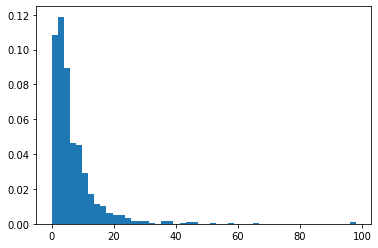

In [ ]:
# plot rich people histogram, make bins at least 50, comment on the plot.
plt.hist(poor_distances, bins=50, density = True)

(array([1.23255148e-01, 9.10507150e-02, 4.21585304e-02, 2.26162950e-02,
        1.15643191e-02, 7.68514877e-03, 5.48939198e-03, 2.70810004e-03,
        2.48852436e-03, 2.12256490e-03, 1.61022165e-03, 1.02468650e-03,
        1.31745408e-03, 8.05110824e-04, 2.92767572e-04, 8.78302717e-04,
        8.05110824e-04, 3.65959465e-04, 2.92767572e-04, 6.58727038e-04,
        2.19575679e-04, 7.31918931e-05, 1.46383786e-04, 0.00000000e+00,
        1.46383786e-04, 7.31918931e-05, 7.31918931e-05, 1.46383786e-04,
        1.46383786e-04, 7.31918931e-05, 7.31918931e-05, 7.31918931e-05,
        0.00000000e+00, 7.31918931e-05, 7.31918931e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.31918931e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.31918931e-05]),
 array([5.16324935e-03, 3.12308094e+00, 6.24099864e+00, 9.35891633e+00,
        1.24768340e+01

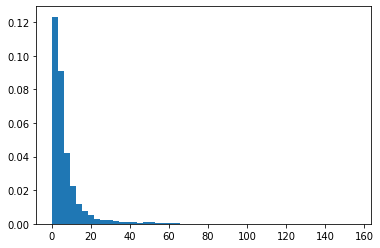

In [ ]:
# plot poor people histogram, make bins at least 50, comment on the plot
plt.hist(rich_distances, bins=50, density = True)

# Distributional Characteristic Statistics

In the following cells please perform some statistical analysis and determine whether rich people are more likely to be struck by extreme weather events, or, poor people are more likely. The methods/statistics presented in week one in class are extremely useful.  

You should also find the difference of mean pooled t-test useful in this case but you must justify your assumptions for using it. You can use any python libraries or functions as well as go on stack overflow. You should also use the functions written up in the previous class [here](https://colab.research.google.com/drive/1L1Kx8qoHCY3yjuYg2tE4W61xu79xG7lJ?usp=sharing).

$$ t = \frac{ \bar{X}_R - \bar{X}_P}{ s_T \sqrt{\frac{1}{n_R} + \frac{1}{n_P}}  } $$

where, 
$$ s_T = \sqrt{ \frac{(n_R - 1)s_R + (n_P -1)s_P}{n_R + n_P - 2}  }  $$

Hint: Use the following function `stats.ttest_ind` and adjust the appropriate setting such that you test wether $\bar{X}_R > \bar{X}_P$, or vice versa.

Hint-2: Use the functions from the previous week's notebook. 

Caveat: Keep resampling techniques under 500 scenarios (in class we used 1000).


### Please write your conclusion at the end wether Rich or Poor people are more likely to get hit by a severe weather storm. 

In [ ]:
## copying from week 1 

In [ ]:
def sample_mean(x: np.array) -> float: 
  """
  calculate the sample mean of a np array
  """
  return(np.mean(x))

def sample_2nd_moment(x: np.array) -> float: 
  """
    calculate the second sample moment. 
  """

  n = x.shape[0]
  m2 = np.sum( (x - sample_mean(x)) **2 ) / n 
  return (m2)

def sample_median(x: np.array) -> float:
  """
    50% quantile really. 
  """
  return (np.median(x))

def sample_min(x: np.array) -> float:
  """
    smallest number in an array
  """
  return np.min(x)

def sample_max(x: np.array)-> float: 
  """
    largest number in an array
  """

  return np.max(x)

def display_statistics(x: np.array) -> None: 
  """
    Display's an f'string formatted to min, median, mean and max for
    basic statistics. 
  """
  x_min = sample_min(x)
  x_med = sample_median(x)
  x_mean = sample_mean(x)
  x_max = sample_max(x)

  display_string = f"Min: {x_min}, Median: {x_med}, Mean: {x_mean}, Max: {x_max} "
  print(display_string)

In [ ]:
B = 500 # n_scenarios
# sample_1 = poor people's distances 
# sample_2 = rich people's distances 
sample_1 = poor_distances
sample_2 = rich_distances

In [ ]:
display_statistics(poor_distances) # for the poor
display_statistics(rich_distances) # for the rich 

Min: 0.016749315043766224, Median: 4.494754229117216, Mean: 6.850633792624417, Max: 98.07617324073907 
Min: 0.005163249349262147, Median: 4.111084454397009, Mean: 7.056007146808246, Max: 155.90104797314964 


In [ ]:
poor_df.iloc[0]

index                      34
Unnamed: 0                 34
Unnamed: 0.1               35
id                    1011340
State_Code                  1
State_Name            Alabama
State_ab                   AL
County          Sumter County
City                   Panola
Place                  Panola
Type                      CDP
Primary                 place
Zip_Code                35477
Area_Code                 205
ALand                 1858530
AWater                 3231.0
Lat                 32.946819
Lon                -88.262264
Mean                    22603
Median                   6190
Stdev                 29054.0
sum_w                9.998089
Name: 34, dtype: object

In [ ]:
poor_distances[]

[11.515935645690217,
 5.233910422651568,
 4.546747982581605,
 1.0615222120590306,
 3.9134191359493604,
 11.607819788116158,
 3.3138274977129223,
 13.333777464166731,
 0.974279523208712,
 1.1626216585606346]

In [ ]:
# combine into df 
data1 = pd.DataFrame({'Group':np.ones(len(sample_1)), 'Values':sample_1})
data1 = data1.append(pd.DataFrame({'Group':np.ones(len(sample_2))*2, 'Values':sample_2}))
tstatistic = stats.ttest_ind(sample_1, sample_2, alternative = 'less')[0] # difference of means (test statistic)
permuted_differences = []

for b in range(B): 
  # b: # of permutation 
  permutation_label = np.random.permutation(data1['Group']) # permute on the labels 
  diff = stats.ttest_ind((data1.loc[permutation_label == 1, 'Values']), (data1.loc[permutation_label == 2, 'Values']), alternative = 'less') # compute test statbetween values of each group 
  permuted_differences.append(diff[0]) # test statistic collected from numerous runs 

p_value = np.sum(permuted_differences >= tstatistic)/B

# print(permuted_differences)
# print(tstatistic)
print(f'Value of test statistic from null distribution: {tstatistic:.3}')
print(f'n permutations >= Sample test statistic = {np.sum(permuted_differences >= tstatistic)}')
print(f'p-value = {p_value:.3}')

Value of test statistic from null distribution: -0.592
n permutations >= Sample test statistic = 356
p-value = 0.712


In [ ]:
pvalue = stats.ttest_ind(sample_1, sample_2, alternative = 'less', permutations = 500)[1]
pvalue


0.274

Clearly, it's very rare for us to observe this value of the test statistic under the null hypothesis. Hence, null hypothesis that both poor and rich are equally affected by the storm events is rejected, making the poor more likely to be affected by severe storm events (as expected in real life). 

Conclusion: p-value is quite large, implying that it is expected to observe this value of the test statistic under the null hypothesis. We accept the null hypothesis, implying that the poor and rich are equally affected by the severe storm events, atleast based on their distance from the events. 